## Observations and Insights 

In [60]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [61]:
# Checking the number of mice.
totalmice = combined_df["Mouse ID"].nunique()
totalmice

249

In [62]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_miceID = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_miceID

array(['g989'], dtype=object)

In [63]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_micedf = combined_df.loc[combined_df["Mouse ID"] == "g989", :]
duplicate_micedf


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [64]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaneddf = combined_df[combined_df['Mouse ID'].isin(duplicate_miceID)==False]
cleaneddf

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [65]:
# Checking the number of mice in the clean DataFrame.
truetotalmice = cleaneddf["Mouse ID"].nunique()
truetotalmice

248

## Summary Statistics

In [76]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drugsummary_df = cleaneddf.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = drugsummary_df['Tumor Volume (mm3)'].mean()
median = drugsummary_df['Tumor Volume (mm3)'].median()
variance = drugsummary_df['Tumor Volume (mm3)'].var()
stddev = drugsummary_df['Tumor Volume (mm3)'].std()
sem = drugsummary_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
tvol_summarydf = pd.DataFrame({
    "Mean":mean,
    "Median":median,
    "Variance": variance,
    "Std. Dev.": stddev,
    "SEM": sem
    }).style.format("{:.2f}").set_caption("Tumor Volume (mm3)")

#show dataframe
tvol_summarydf


,Mean,Median,Variance,Std. Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [71]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
tvagg_summarydf = cleaneddf.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem']).style.format("{:.2f}")
tvagg_summarydf

## Bar and Pie Charts

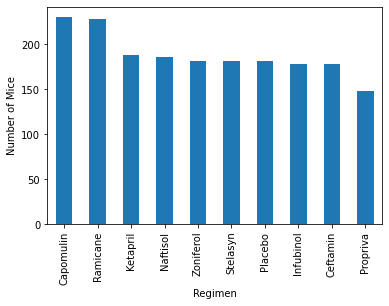

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#count the total number of timepoints per regimen
regimencount = cleaneddf["Drug Regimen"].value_counts()
regimencount

#create pandas bar chart
bar_pandas = regimencount.plot.bar()

#add axis labels
plt.xlabel("Regimen")
plt.ylabel("Number of Mice");


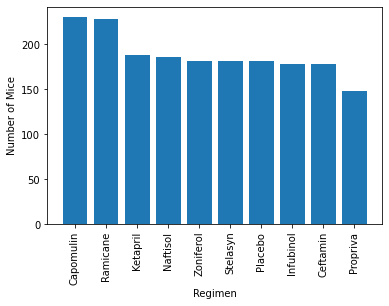

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#first create x and y axes 
x_axis = regimencount.index.values
y_axis = regimencount.values

#create pyplot bar chart 
bar_py = plt.bar(x_axis, y_axis, align='center')

#add axis labels and turn regimen names to vertical
plt.xlabel("Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation='vertical')

#display the graph
plt.show()


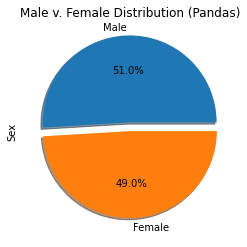

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#count the totals for each gender
gendercount = cleaneddf["Sex"].value_counts()
gendercount

#create pandas bar chart
pie_pandas = gendercount.plot.pie(autopct="%1.1f%%", shadow=True, explode=(0.1, 0))
plt.title('Male v. Female Distribution (Pandas)');

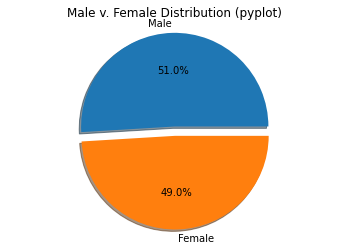

In [55]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#first create pie values 
genders = gendercount.index.values
totals = gendercount.values

#create pyplot bar chart 
pie_py = plt.pie(totals, explode = (0.1,0), labels=genders, 
                 autopct="%1.1f%%", shadow=True);

#ensure equal axes
plt.axis("equal")
plt.title('Male v. Female Distribution (pyplot)')

#display the graph
plt.show()

## Quartiles, Outliers and Boxplots

In [124]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
#create dataframe from grouping by mouse ID and finding max timepoint of each
max_timedf = pd.DataFrame(cleaneddf.groupby(['Mouse ID'])['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'Max Timepoint'})
max_timedf

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_df = pd.merge(cleaneddf, max_timedf, on=('Mouse ID'))

#show preview of df
max_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [131]:
# Put treatments into a list for For loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorvol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments:
    
    temp_df = max_df.loc[max_df["Drug Regimen"] == drug]
    
    #add subset
    finalvol_df = temp_df.loc[temp_df['Timepoint'] == temp_df['Max Timepoint']]
    
    #series of final volume values for each drug and add to empty list
    values = finalvol_df['Tumor Volume (mm3)']
    tumorvol_data.append(values)

    #find and print IQR for each drug
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    IQR = upperq - lowerq
    print(f'IQR for {drug}: {IQR}')
    
    # Determine outliers using upper and lower bounds
    #find bounds
    lower_bound = lowerq - (1.5*IQR)
    upper_bound = upperq + (1.5*IQR)
    print(f'Lower bound for {drug}: {lower_bound}')
    print(f'upper bound for {drug}: {upper_bound}')
    
    #check for outliers
    outliers = (values.loc[(finalvol_df['Tumor Volume (mm3)'] >= upper_bound) |
                          (finalvol_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'The number of {drug} outliers: {outliers}')

IQR for Capomulin: 7.781863460000004
Lower bound for Capomulin: 20.70456164999999
upper bound for Capomulin: 51.83201549
The number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower bound for Ramicane: 17.912664470000003
upper bound for Ramicane: 54.30681135
The number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower bound for Infubinol: 36.83290494999999
upper bound for Infubinol: 82.74144559000001
The number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower bound for Ceftamin: 25.355449580000002
upper bound for Ceftamin: 87.66645829999999
The number of Ceftamin outliers: 0


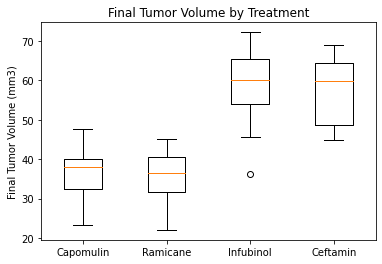

In [139]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumorvol_data)
plt.title('Final Tumor Volume by Treatment')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1,2,3,4],treatments)
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Capolmulin Treatment of Mouse i738')

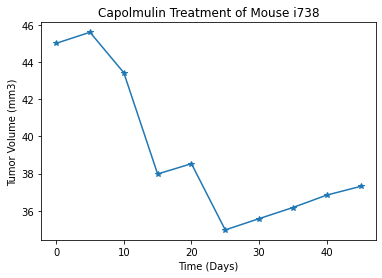

In [149]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#choose capomulin mouse
cap_mouse = cleaneddf.loc[cleaneddf['Mouse ID'] == 'i738']

#generate the line plot
plt.plot(cap_mouse['Timepoint'], cap_mouse['Tumor Volume (mm3)'], marker='*')
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capolmulin Treatment of Mouse i738")

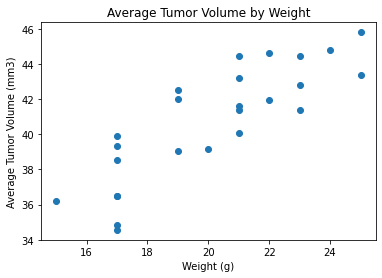

In [159]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#create dataframe for only capomulin data
cap_df = cleaneddf.loc[cleaneddf['Drug Regimen'] == 'Capomulin']

#find average tumor volume for each mouse
avgvol_df = pd.DataFrame(cap_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(
    columns={'Tumor Volume (mm3)':'avg_tumor_vol'})

#merge dfs and remove duplicates
avgvol_df = pd.merge(cap_df, avgvol_df, on='Mouse ID')
final_df = avgvol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_df

#set x and y variables to df columns
x = final_df['Weight (g)']
y = final_df['avg_tumor_vol']

#generate scatter plot
plt.scatter(x,y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume by Weight");

## Correlation and Regression

In [162]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#find correlation coefficient and print
correlation = st.pearsonr(x,y)
print(f'The correlation between weight and average tumor volume on the Capomulin regimen is {round(correlation[0],2)}.')

#find linear regression
(slope, intercept, rvalue, pvalue, stderr) = lineregress(x,y)

The correlation between weight and average tumor volume on the Capomulin regimen is 0.84.


NameError: name 'lineregress' is not defined